# Моделирование | «Связанные маятники»

Два одинаковых математических маятника, связанных пружиной с коэффициентом
жёсткости $k$ на расстоянии $L_1$ от точки крепления маятников. Точки крепления обоих
связанных маятников находятся на одном уровне. Оба математических маятника имеют
одинаковые длины подвеса $L$ и массы $m$ (см. Рис.). Сила сопротивления для каждого
маятника прямо пропорциональна скорости. Коэффициент затухания каждого маятника равен $\beta$. Для заданных начальных отклонений построить графики зависимостей углов и
скоростей от времени для каждого маятника. Найти нормальные частоты. Параметры
должны задаваться.

In [153]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

In [154]:
L = 1.0  # Длина маятника
L1 = 1 # Расстояние от крепежа маятника до места крепления пружины
d = 0.5  # Distance between the pendulums
k = 0.9  # Коэффициент жёсткости пружины
b = 0.0 # Коэффициент затухания
m1 = 1.0  # Масса первого маятника
m2 = 1.0  # Масса второго маятника
g = 9.81  # Ускорение свободного падения

# Начальные фазы и угловые скорости
phi_1 = 1
phi_2 = -1
y0 = [phi_1, 0, phi_2, 0]

# Время (в секундах и количестве замеров)
t = 100

Сила тяжести:

$$ \vec{F}_{тяж} = m\vec{g} $$

Сила упрогости пружины:

$$ \vec{F}_{упр} = -kx = -k \cdot L_1 (tg{\varphi_2} - tg{\varphi_1}) \sim -k \cdot L_1 (\varphi_2 - \varphi_1) $$

Сила затухания:

$$ F_з = - \beta \cdot L \cdot \omega $$

Распишем уравнения моментов для каждого маятника:

$$ 
\begin{cases}

m_1 L^2 \cdot \varphi''_1 = -F_{тяж} \cdot L \cdot sin \varphi_1 + F_{упр} \cdot L_1 \cdot \cos{\varphi_1} + F_{зат} \\
m_2 L^2 \cdot \varphi''_2 = -F_{тяж} \cdot L \cdot sin \varphi_2 - F_{упр} \cdot L_1 \cdot \cos{\varphi_2} + F_{зат} \\

\end{cases}
$$

подставим полученные формулы:

$$ 
\begin{cases}

m_1 L^2 \cdot \varphi''_1 = -m_1 g \cdot L \cdot sin \varphi_1 - k \cdot (\varphi_2 - \varphi_1) \cdot L_1^2 \cdot \cos{\varphi_1} - \beta \cdot L \cdot \omega_1 \\
m_2 L^2 \cdot \varphi''_2 = -m_2 g \cdot L \cdot sin \varphi_2 + k \cdot (\varphi_2 - \varphi_1) \cdot L_2^2 \cdot \cos{\varphi_2} - \beta \cdot L \cdot \omega_2 \\

\end{cases}
$$


$$
\begin{cases}

\varphi''_1 = -\frac{g}{L} \cdot sin \varphi_1 - \frac{k}{m_1 L^2_1} \cdot (\varphi_2 - \varphi_1) \cdot L_1^2 \cdot \cos{\varphi_1} - \frac{\beta}{m_1L} \cdot  \omega_1 \\
\varphi''_2 = -\frac{g}{L} \cdot sin \varphi_2 + \frac{k}{m_1 L^2_2} \cdot (\varphi_2 - \varphi_1) \cdot L_1^2 \cdot \cos{\varphi_2} - \frac{\beta}{m_2L} \cdot  \omega_2 \\

\end{cases}
$$

$$

\begin{cases}

\varphi''_1 = -\frac{g}{L} \cdot \varphi_1 - \frac{k L^2_1}{m_1 L^2} \cdot (\varphi_2 - \varphi_1) - \frac{\beta}{m_1L} \cdot \omega_1 \\
\varphi''_2 = -\frac{g}{L} \cdot \varphi_2 + \frac{k}{m_1 L^2_2} \cdot (\varphi_2 - \varphi_1) - \frac{\beta}{m_2L} \cdot \omega_2 \\

\end{cases} \\ 

$$

Помимо собственных частот вводятся нормальные частоты, 
они получаются если прийти к нормальным координатам

$$
\begin{cases}

\varphi''_1 = -\frac{g}{L} \cdot \varphi_1 - \frac{k L^2_1}{m_1 L^2} \cdot (\varphi_2 - \varphi_1) - \frac{\beta}{m_1L} \cdot \omega_1 = 0 \\
\varphi''_2 = -\frac{g}{L} \cdot \varphi_2 + \frac{k}{m_1 L^2_2} \cdot (\varphi_2 - \varphi_1) - \frac{\beta}{m_2L} \cdot \omega_2 = 0\\

\end{cases} \\ 
$$

$$
\begin{cases}

(\varphi''_1 - \varphi''_2) + \frac{g}{L} \cdot (\varphi_1 + \varphi_2) + 2 \frac{\beta}{m_1L} \cdot \omega_1 = 0 \\
(\varphi''_2 - \varphi''_1) + \frac{g}{L} \cdot (\varphi_1 - \varphi_2) + 2 \frac{kL^2_1}{m_2L^2} \cdot (\varphi_2 - \varphi_1) = 0

\end{cases} \\ 
$$

$$

\varepsilon_1 = \varphi_1 + \varphi_2, \\
\varepsilon_2 = \varphi_1 - \varphi_2; \\

\begin{cases}

\varepsilon''_1 + \frac{g}{L} \cdot \varepsilon_1 + 2 \frac{\beta}{m_1L} \cdot \omega_1 = 0 \\
\varepsilon''_2 + \frac{g}{L} \cdot \varepsilon_2 + 2 \frac{kL^2_1}{m_2L^2} \cdot \varepsilon_2 = 0

\end{cases} \\ 
$$

$$
\Omega_{1n} = \omega_0 = \sqrt{\frac{g}{L}} \\
\Omega_{2n} = \sqrt{\frac{g}{L}+2\cdot\frac{kL_1^2}{mL^2}} \\
$$

In [155]:
# Нахождение нормальных частот
def normal_frequencies():
  Omega_1n = math.sqrt(g/L)
  Omega_2n = math.sqrt(g/L + 2*k*L1**2/(m1*L**2))
  return Omega_1n, Omega_2n

In [156]:
# def derivatives(Y, t, m1, m2, L, g, k, L1, beta):
#   phi1, omega1, phi2, omega2 = Y
#   dphi1_dt = omega1
#   dphi2_dt = omega2
#   domega1_dt = -(g/L)*phi1 - (beta/(m1*L))*omega1 + (k*L1**2/(m1*L**2))*(phi2 - phi1)
#   domega2_dt = -(g/L)*phi2 - (beta/(m2*L))*omega2 + (k*L1**2/(m2*L**2))*(phi1 - phi2)
#   return [dphi1_dt, domega1_dt, dphi2_dt, domega2_dt]

def derivatives(Y, t, m1, m2, L, g, k, L1, beta):
    phi1, omega1, phi2, omega2 = Y
    dphi1_dt = omega1
    dphi2_dt = omega2
    domega1_dt = -(g / L) * np.sin(phi1) - (beta / (m1 * L)) * omega1 + (k * L1**2 / (m1 * L**2)) * (phi2 - phi1) * np.cos(phi1)
    domega2_dt = -(g / L) * np.sin(phi2) - (beta / (m2 * L)) * omega2 + (k * L1**2 / (m2 * L**2)) * (phi1 - phi2) * np.cos(phi2)
    return [dphi1_dt, domega1_dt, dphi2_dt, domega2_dt]


In [157]:
number_of_measurements = 1000
time = np.linspace(0, t, number_of_measurements)

# Решение дифференциального уравнения
solution = odeint(derivatives, y0, time, args=(m1, m2, L, g, k, L1, b))
phi1 = solution[:, 0]
phi2 = solution[:, 2]
omega1 = solution[:, 1]
omega2 = solution[:, 3]


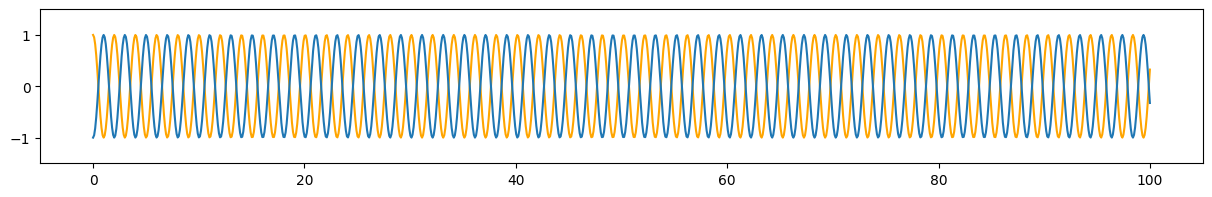

In [158]:
# Построение графиков углов от времени
plt.figure(figsize=(15, 2))
plt.ylim(-max(phi_1, phi_2)-0.5, max(phi_1, phi_2) + 0.5)
plt.plot(time, phi1, label='Phi 1', color="orange")
plt.plot(time, phi2, label='Phi 2')
plt.show()

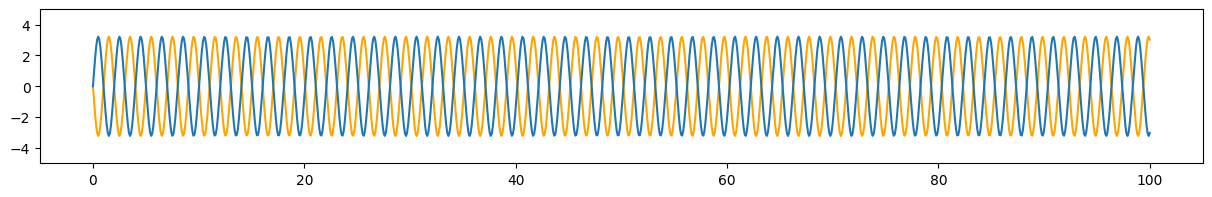

In [159]:

# Построение графиков скоростей от времени
plt.figure(figsize=(15, 2))
plt.ylim(-5, 5)
plt.plot(time, omega1, label='Omega 1', color="orange")
plt.plot(time, omega2, label='Omega 2')

In [160]:
print(normal_frequencies())

(3.132091952673165, 3.4073450074801643)
